In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBacked.figure_format='retina'

In [63]:
data = pd.read_csv('thaipop.csv')
data.dropna(axis='columns',inplace=True)
data.drop(['x-axis','date'],axis='columns',inplace=True)
time = pd.date_range('2011',periods=129,freq='M')
data.insert(0,'date',time)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    129 non-null    datetime64[ns]
 1   bfw     129 non-null    object        
 2   w       129 non-null    object        
 3   rt      129 non-null    object        
 4   total   129 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ KB


In [64]:

for col in data[['bfw','w','rt','total']] :
    data[col] = data[col].str.replace(',','')
    data[col] = pd.to_numeric(data[col])
data

,date,bfw,w,rt,total
0,2011-01-31,11434473,43117850,8050302,62602625
1,2011-02-28,11485427,43108601,8029726,62623754
2,2011-03-31,11537724,43098162,8009742,62645628
3,2011-04-30,11593359,43063835,7989684,62646878
4,2011-05-31,11665017,43059560,7966507,62691084
...,...,...,...,...,...
124,2021-05-31,10613614,42558670,11821609,64993893
125,2021-06-30,10594341,42537307,11853998,64985646
126,2021-07-31,10568532,42523388,11882208,64974128
127,2021-08-31,10545739,42508214,11906511,64960464


Pearson Correlation

In [65]:
dcrr = data[['bfw','w','rt','total']].corr()
dcrr.style.background_gradient()

,bfw,w,rt,total
bfw,1.000000,0.625193,-0.714241,-0.273677
w,0.625193,1.000000,-0.307079,0.185935
rt,-0.714241,-0.307079,1.000000,0.849752
total,-0.273677,0.185935,0.849752,1.000000


In [69]:
mask = np.zeros_like(dcrr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<AxesSubplot:>

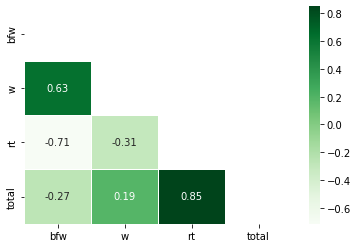

In [72]:
sns.heatmap(dcrr ,cmap = 'Greens',annot = True ,fmt = '.2f',mask= mask , linewidths=0.5)